In [89]:
#первый способ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

data = pd.read_csv('/Users/andreihauryk/Desktop/dataset.csv', index_col = 0)
data.head()

,65660,0
65656,,
65660,65664,0
65664,65668,0
65668,65672,0
65672,65676,0
65672,65676,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 65660 to 65680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   65660   48 non-null     int64
 1   0       48 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [91]:
data.isnull().any()

65660    False
0        False
dtype: bool

In [92]:
data.shape

(48, 2)

In [93]:
temp_data = data['0']
data_x = data.copy()
data_x = data_x.drop('0', axis =1)
X = data_x
print("    __X__")
X.head()

    __X__


,65660
65656,
65660,65664
65664,65668
65668,65672
65672,65676
65672,65676


In [94]:
le = LabelEncoder()
temp_data = le.fit_transform(temp_data)
Y = temp_data
print("__Y__")
Y

__Y__


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0])

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.3, random_state = 42)


print("Training split input- ", x_train.shape)
print("Testing split input- ", y_test.shape)

Training split input-  (33, 1)
Testing split input-  (15,)


In [96]:
decision_tree=DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree.score(x_test,y_test)))



Accurancy on training set: 0.969697
Accurancy on test set: 1.000000


[Text(558.0, 815.4000000000001, '65660 <= 65666.0\ngini = 0.4775\nsamples = 33\nvalue = [20, 13]\nclass = pc'),
 Text(279.0, 271.79999999999995, 'gini = 0.1327\nsamples = 14\nvalue = [1, 13]\nclass = target'),
 Text(837.0, 271.79999999999995, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = pc')]

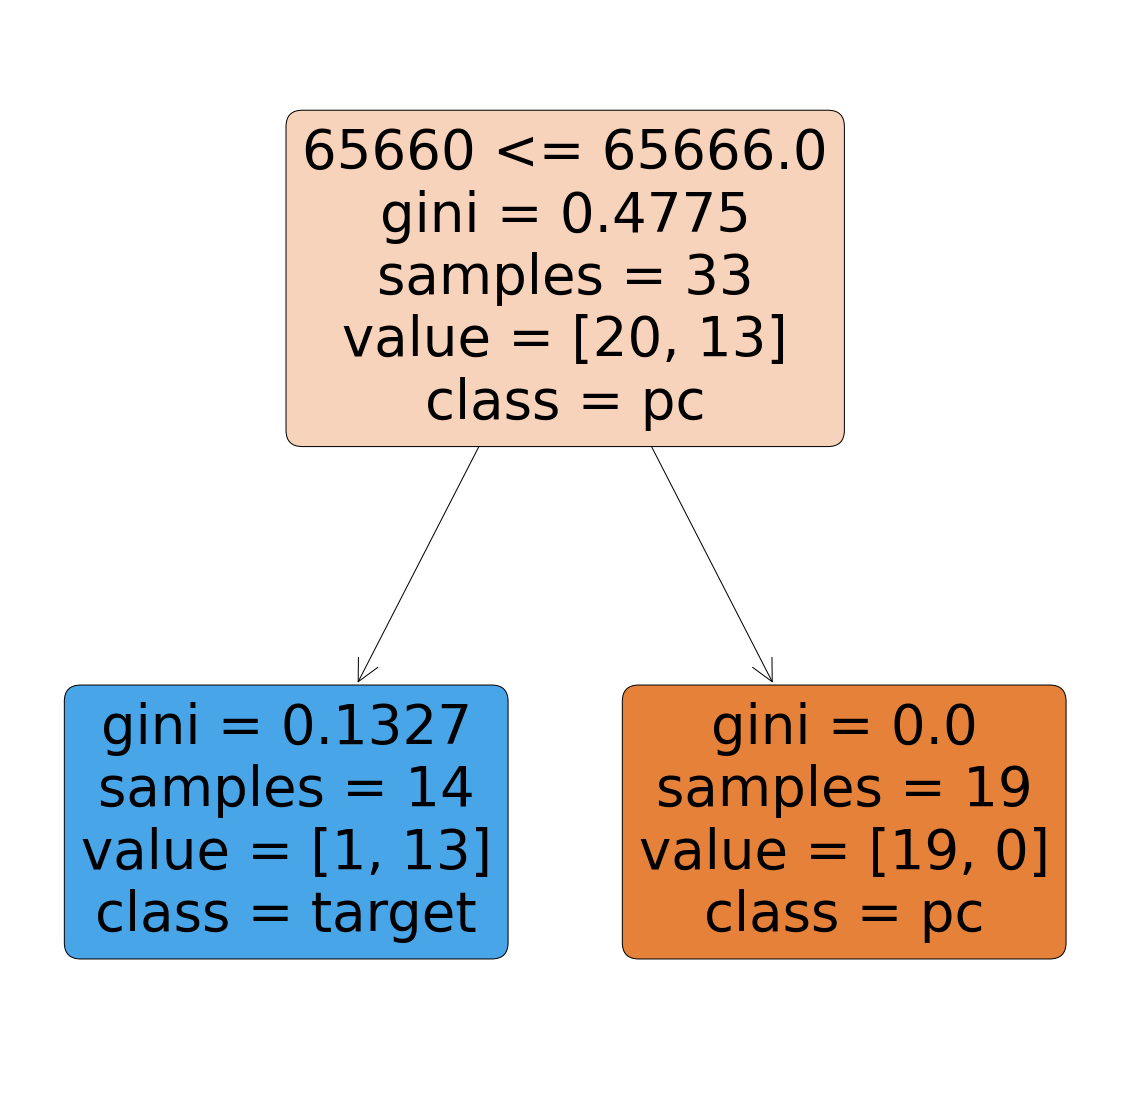

In [97]:
plt.figure(figsize = (20,20))
decision_tree = plot_tree(decision_tree=decision_tree, feature_names = data_x.columns, 
                     class_names =["pc", "target", "Taken,y or n"] , filled = True , precision = 4, rounded = True)

plt.savefig("one1.png")
decision_tree

In [98]:
print("Predicted values:\n",y_pred)

Predicted values:
 [0 1 0 0 1 1 1 0 0 1 1 0 0 0 1]


In [100]:
decision_tree_2=DecisionTreeClassifier(criterion="entropy",max_depth=3)
desion_tree_2 = decision_tree_2.fit(x_train,y_train)
y_pred_2 = decision_tree_2.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree_2.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree_2.score(x_test,y_test)))

Accurancy on training set: 0.969697
Accurancy on test set: 1.000000
